# Hotel Booking Demand

TODO - Write some introduction about your project here: describe the dataset, where you got it from, what you're trying to do with it, and which tools & techniques you're using. You can also mention about the course [Data Analysis with Python: Zero to Pandas](zerotopandas.com), and what you've learned from it.

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

**TODO** - add some explanation here

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
# Change this
dataset_url = 'https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand/code?resource=download' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./hotel-booking-demand" (use force=True to force download)


The dataset has been downloaded and extracted.

In [4]:
# Change this
data_dir = 'hotel-booking-demand/'

In [5]:
import os
os.listdir(data_dir)

['hotel_bookings.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "hotel-booking-demand-data analysis" # change this (use lowercase letters and hyphens only)

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "saumilgupta7392/hotel-booking-demand-data-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/saumilgupta7392/hotel-booking-demand-data-analysis


'https://jovian.com/saumilgupta7392/hotel-booking-demand-data-analysis'

## Data Preparation and Cleaning

**TODO** - Write some explanation here.
Pandas is a popular Python library used for working in tabular data (similar to the data stored in a spreadsheet). Pandas provides helper functions to read data from various file formats like CSV, Excel spreadsheets, HTML tables, JSON, SQL, and more. 

The dataset is in the csv format

CSVs: A comma-separated values (CSV) file is a delimited text file that uses a comma to separate values. Each line of the file is a data record. Each record consists of one or more fields, separated by commas. A CSV file typically stores tabular data (numbers and text) in plain text, in which case each line will have the same number of fields. (Wikipedia)


> Instructions (delete this cell):
>
> - Load the dataset into a data frame using Pandas
> - Explore the number of rows & columns, ranges of values etc.
> - Handle missing, incorrect and invalid data
> - Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)

In [10]:
import pandas as pd
import numpy as np

To read the file, we can use the `read_csv` method from Pandas. First, let's install the Pandas library.

In [11]:
df=pd.read_csv(data_dir+'hotel_bookings.csv')

In [12]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [14]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [15]:
df.shape

(119390, 32)

In [16]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [17]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [18]:
df.nunique(axis=0)

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

unique values (excluding NaN) of all columns of the dataset\
the concerned thing is represented in this format\
Column Name:Unique values

In [19]:
for column in df.columns:
    if len(df[column].unique())<1000:
        print(f'{column}:',df[column].unique())

hotel: ['Resort Hotel' 'City Hotel']
is_canceled: [0 1]
lead_time: [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174 330 134 350 334 283 153 197 133 241 193 235 

In [20]:
df.select_dtypes(include=np.number)


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,NaN,NaN,0,0.00,0,0
1,0,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,NaN,NaN,0,0.00,0,0
2,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,NaN,NaN,0,75.00,0,0
3,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,304.0,NaN,0,75.00,0,0
4,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,240.0,NaN,0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,35,30,2,5,2,0.0,0,0,0,0,0,394.0,NaN,0,96.14,0,0
119386,0,102,2017,35,31,2,5,3,0.0,0,0,0,0,0,9.0,NaN,0,225.43,0,2
119387,0,34,2017,35,31,2,5,2,0.0,0,0,0,0,0,9.0,NaN,0,157.71,0,4
119388,0,109,2017,35,31,2,5,2,0.0,0,0,0,0,0,89.0,NaN,0,104.40,0,0


In [21]:
import jovian

In [22]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "saumilgupta7392/hotel-booking-demand-data-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/saumilgupta7392/hotel-booking-demand-data-analysis


'https://jovian.com/saumilgupta7392/hotel-booking-demand-data-analysis'

## Exploratory Analysis and Visualization

**TODO** - write some explanation here.



> Instructions (delete this cell)
> 
> - Compute the mean, sum, range and other interesting statistics for numeric columns
> - Explore distributions of numeric columns using histograms etc.
> - Explore relationship between columns using scatter plots, bar charts etc.
> - Make a note of interesting insights from the exploratory analysis

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [23]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Demand of what type of hotel in which year

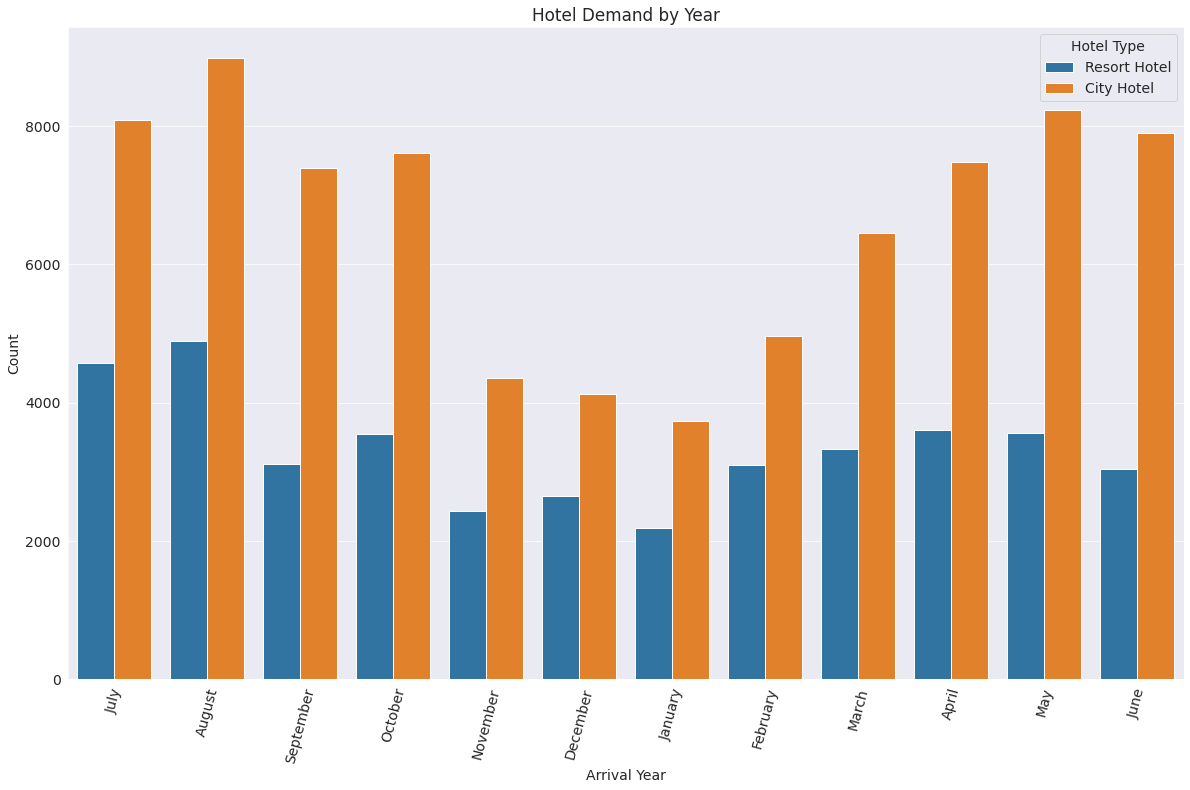

In [24]:
plt.figure(figsize=[20,12])
sns.countplot(data=df, x='arrival_date_month', hue='hotel')

# Set labels and title
plt.xlabel('Arrival Year')
plt.ylabel('Count')
plt.title('Hotel Demand by Year')
plt.xticks(rotation=75)

# Show the plot
plt.legend(title='Hotel Type', loc='upper right')
plt.show()


Bookings for City Hotel is very high compared to the Resort Hotel

### Proportions of bookings are canceled 

<function matplotlib.pyplot.show(close=None, block=None)>

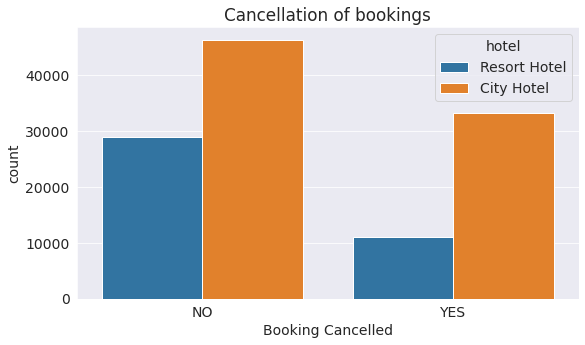

In [25]:
plot=sns.countplot(data=df, x='is_canceled',hue='hotel')
plot.set_xticklabels(['NO', 'YES'])
plot.set_title("Cancellation of bookings")
plot.set_xlabel("Booking Cancelled")
plt.show

In [26]:
#percentage of total canceled booking
total_booking_cancel_percentage=df['is_canceled'].sum()/len(df['is_canceled'])*100

print("total booking canceled:",total_booking_cancel_percentage,"%")

# percentage of canceled bookings for Resort Hotel
resort_booking_cancel_percentage = (df[df['hotel'] == 'Resort Hotel']['is_canceled'].sum() /
                            len(df[df['hotel'] == 'Resort Hotel'])) * 100

print("resort hotel booking canceled:",resort_booking_cancel_percentage,"%")

# percentage of canceled bookings for City Hotel
city_booking_cancel_percentage = (df[df['hotel'] == 'City Hotel']['is_canceled'].sum() /
                          len(df[df['hotel'] == 'City Hotel'])) * 100

print("city hotel booking canceled:",city_booking_cancel_percentage,"%")

total booking canceled: 37.041628277075134 %
resort hotel booking canceled: 27.763354967548675 %
city hotel booking canceled: 41.72696331778646 %


the bookings cancelled of resort hotels are much less than compared to city hotels

### Number of guests in a booking

In [27]:
df['total_guests'] = df['adults'] + df['children'] + df['babies']


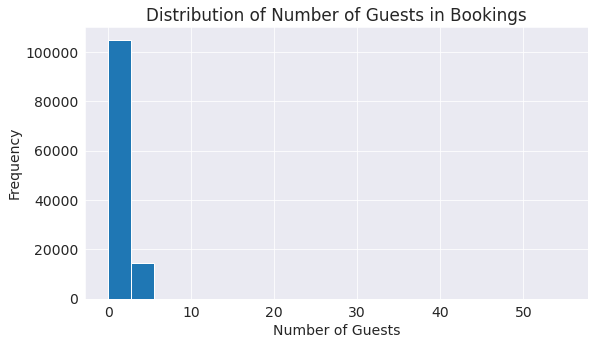

In [28]:
plt.hist(df['total_guests'],bins=20)

plt.xlabel('Number of Guests')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Guests in Bookings')

plt.show()

### Repeated Guests

In [29]:
resort_repeated_guests_percentage=df[df['hotel']=='Resort Hotel']['is_repeated_guest'].sum()/len(df)*100
city_repeated_guests_percentage=df[df['hotel']=='City Hotel']['is_repeated_guest'].sum()/len(df)*100

In [30]:
print("the percentage of guests repeating in resort hotels are",resort_repeated_guests_percentage,"%")
print("the percentage of guests repeating in city hotels are",city_repeated_guests_percentage,"%")

the percentage of guests repeating in resort hotels are 1.489236954518804 %
the percentage of guests repeating in city hotels are 1.7019850908786331 %


### Customer Type

In [31]:
df.customer_type.value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

In [32]:
df.customer_type.value_counts(normalize=True)

Transient          0.750591
Transient-Party    0.210436
Contract           0.034140
Group              0.004833
Name: customer_type, dtype: float64

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


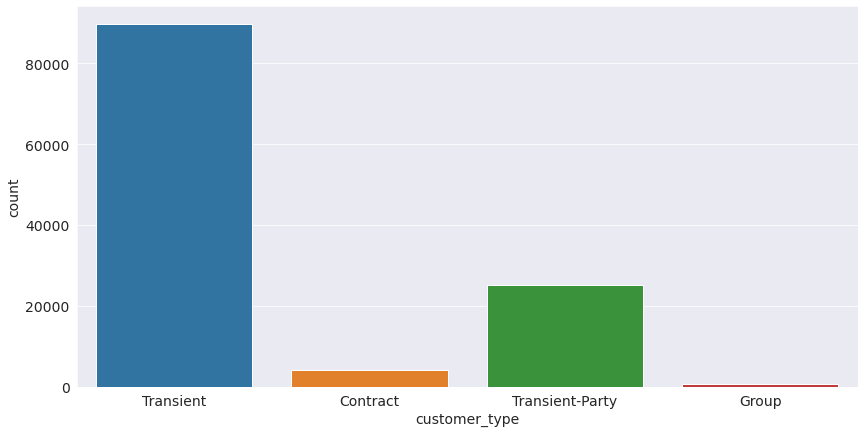

In [33]:
plt.figure(figsize=(14,7))
sns.countplot(df['customer_type'])
plt.show()

Let us save and upload our work to Jovian before continuing

In [34]:
import jovian

In [35]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "saumilgupta7392/hotel-booking-demand-data-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/saumilgupta7392/hotel-booking-demand-data-analysis


'https://jovian.com/saumilgupta7392/hotel-booking-demand-data-analysis'

## Asking and Answering Questions

TODO - write some explanation here.



> Instructions (delete this cell)
>
> - Ask at least 5 interesting questions about your dataset
> - Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
> - Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
> - Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does



#### Q1: Which are the three most common and uncommon countries of origin?

In [36]:
most_common=df['country'].value_counts().head(3)
most_uncommon=df['country'].value_counts().tail(3)

In [37]:
print("Most common countries of origin are:\n",most_common)
print("Most uncommon countries of origin are:\n",most_uncommon)

Most common countries of origin are:
 PRT    48590
GBR    12129
FRA    10415
Name: country, dtype: int64
Most uncommon countries of origin are:
 HND    1
VGB    1
NAM    1
Name: country, dtype: int64


As we can see, Portugal tops the list with 48,586 of the cases, followed by Great Britain with 12,129 and France with 10,415.

and for most uncommon countries of origin there many countries in the list

#### Q2: What is the most popular meal package?



In [38]:
df['meal'].value_counts(normalize=True)

BB           0.773180
HB           0.121141
SC           0.089203
Undefined    0.009791
FB           0.006684
Name: meal, dtype: float64

Bed & Breakfast option is the most popular, with a frequency of 77.26%.

#### Q3: Which year has most arrivals?

In [39]:
year_arrival=df['arrival_date_year'].value_counts().sort_index()
year_arrival

2015    21996
2016    56707
2017    40687
Name: arrival_date_year, dtype: int64

([<matplotlib.axis.XTick at 0x7f3d6f0e1ac0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

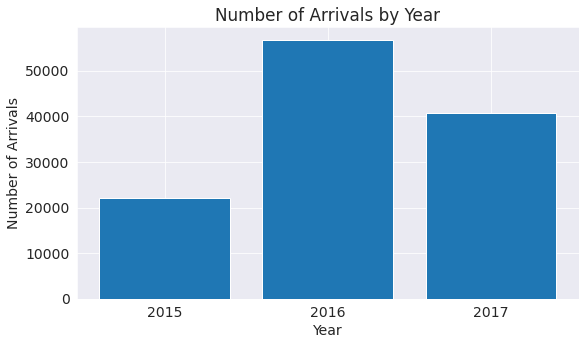

In [40]:
plt.bar(year_arrival.index,year_arrival.values)

plt.xlabel('Year')
plt.ylabel('Number of Arrivals')
plt.title('Number of Arrivals by Year')

plt.xticks(year_arrival.index)

from the bar chart above it is showing that the year 2016 has the arrivals of guests in both hotels

#### Q4: How many car parking spaces have been used?

In [41]:
df['required_car_parking_spaces'].sum()

7464

In [42]:
print(df['required_car_parking_spaces'].sum(),"car parking spaces have been used by the guests")

7464 car parking spaces have been used by the guests


### compare the stay of guests in weekend nights and week nights

In [43]:
weekend=df['stays_in_weekend_nights'].sum()
weekend

110746

In [44]:
week=df['stays_in_week_nights'].sum()
week

298511

Text(0.5, 1.0, 'stay in weekend or week')

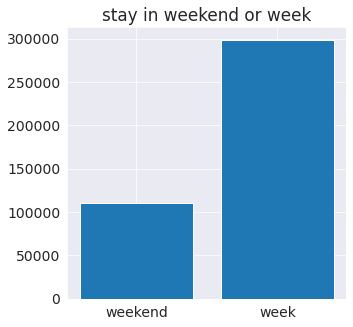

In [45]:
plt.figure(figsize=(5,5))
plt.bar(['weekend','week'],[weekend,week])

plt.title('stay in weekend or week')

the stay of guests in week is much more than weekends

Let us save and upload our work to Jovian before continuing.

In [46]:
import jovian

In [47]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "saumilgupta7392/hotel-booking-demand-data-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/saumilgupta7392/hotel-booking-demand-data-analysis


'https://jovian.com/saumilgupta7392/hotel-booking-demand-data-analysis'

## Inferences and Conclusion

**TODO** - Write some explanation here: a summary of all the inferences drawn from the analysis, and any conclusions you may have drawn by answering various questions.

In [48]:
import jovian

In [49]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "saumilgupta7392/hotel-booking-demand-data-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/saumilgupta7392/hotel-booking-demand-data-analysis


'https://jovian.com/saumilgupta7392/hotel-booking-demand-data-analysis'

## References and Future Work

**TODO** - Write some explanation here: ideas for future projects using this dataset, and links to resources you found useful.

> Submission Instructions (delete this cell)
> 
> - Upload your notebook to your Jovian.ml profile using `jovian.commit`.
> - **Make a submission here**: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
> - Share your work on the forum: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
> - Share your work on social media (Twitter, LinkedIn, Telegram etc.) and tag [@JovianML](https://twitter.com/jovianml)
>
> (Optional) Write a blog post
> 
> - A blog post is a great way to present and showcase your work.  
> - Sign up on [Medium.com](https://medium.com) to write a blog post for your project.
> - Copy over the explanations from your Jupyter notebook into your blog post, and [embed code cells & outputs](https://medium.com/jovianml/share-and-embed-jupyter-notebooks-online-with-jovian-ml-df709a03064e)
> - Check out the Jovian.ml Medium publication for inspiration: https://medium.com/jovianml


 

In [50]:
import jovian

In [51]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "saumilgupta7392/hotel-booking-demand-data-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/saumilgupta7392/hotel-booking-demand-data-analysis


'https://jovian.com/saumilgupta7392/hotel-booking-demand-data-analysis'